# NLP Text Classification For  Climate Change Belief Analysis
## Predict an individual's belief in climate change based on historical tweet data.

# Problem Statement
##### We are given a task to predict based on peoples opinions on climate change whether or not they believe if it is real or not. This would add value to companies market research efforts in estimating how their product or services may be received.
##### We are required to use one of the machine learning models 'Classification' to classify whether or not a prson believes in climate change based on the data collected on tweeter.

# Solution
In solving this problem, we will have to use NLP and machine learning. The first thing we will do is to import all required libraries. We will import data and then perform exploratory data analysis(EDA). We will perform text pre-processing to convert data or text into numerical information to implement machine learning algorithms. Finally, Machine Learning algorithms and test our sentiment analysis and then do comparison between these algorithms. Then we will tell which one provides accurate results based on F1-Score.


In [1]:
import re  #regular expression
import nltk  # text manipulation

import string
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Thandazani/Desktop/Explore Data Science/Machine Learning/Machine Learning Project 2/Advanced_Classification_Predict-student_data-2780/train.csv")
test =pd.read_csv("C:/Users/Thandazani/Desktop/Explore Data Science/Machine Learning\Machine Learning Project 2/Advanced_Classification_Predict-student_data-2780/test_with_no_labels.csv")

In [3]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


Data Inpection and Cleaning
Text is a highly unstractured form of data, various of noise are present in it and the data is not readly analyzable without pre-processing. The process of cleaning and standardization of text, making it noise free and ready for analysis is known as text pre-processing. we will divide it into two:
Inspecting Data
Cleaning Data
Data Inspection

In [4]:
df.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [5]:
df.dtypes

sentiment     int64
message      object
tweetid       int64
dtype: object

In [6]:
df_cpy = df.copy()

In [7]:
df_cpy.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [8]:
df_cpy[df_cpy['sentiment'] == 0].head()

,sentiment,message,tweetid
19,0,Calum: *tweets abt reunitingish w the cast*\n-sees replies begging him to come to their countries-\nCalum: *goes back to rting climate change*,547924
22,0,"we also met this guy, he let us in on some truth about climate change and gay people not existing https://t.co/Q7yOMcMZaj",67545
30,0,@Jnp_Ftw are these the same scientists that denounce climate change? It's not a choice,365051
39,0,We’ ve dealt with simple issues like climate change and energy policy. Now the complex issues. Mal vs Tones. #qanda,403368
43,0,"RT @andrewsharp: Win probability is bullshit man. I saw the NBA Finals and that's when I knew, global warming isn't real",326916


In [9]:
df_cpy[df_cpy['sentiment'] == 1].head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954
5,1,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,425577


In [10]:
df_cpy[df_cpy['sentiment'] == 2].head()

,sentiment,message,tweetid
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
12,2,"RT @tveitdal: We only have a 5 percent chance of avoiding ‘dangerous’ global warming, a study finds https://t.co/xUBTqNxhkK https://t.co/of…",454673
14,2,"Fossil fuel giant ExxonMobil ‘misled’ the public about climate change, Harvard academics conclude https://t.co/ofc2WSu4EX",658092
26,2,Bangladesh confronting climate change head on https://t.co/MTqeNBQDUt https://t.co/itgkUxgEfg,365291
32,2,RT @latimes: Atmospheric rivers fueled by climate change could decimate wild oysters in San Francisco Bay https://t.co/p0LZBhlU5K https://t…,143471


In [11]:
df_cpy[df_cpy['sentiment'] == -1].head()

,sentiment,message,tweetid
28,-1,Sally Kohn’s latest evidence of climate change proves she is ‘not a smart person’ https://t.co/MhkzoGL9Vt via @twitchyteam Need we say more,355491
46,-1,@realDonaldTrump Carbon Tax is a Globalist idea to enslave the world's population. It is the whole reason for propagating global warming!,61141
48,-1,"RT @SteveSGoddard: We had winds close to 100 MPH in the area this afternoon. I would blame climate change, except that this happens pr…",719523
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining about snowflakes ❄️ in winter =global warming 🤦‍♂️,911385
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwarzenegger's vehicles. He is now whining about climate change.\nHow's his maid...illegal or\nhttp…,768263


There are so many words and characters which are not important or required. So we will try to keep only those words which are important.

#### Checking dimension of train dataset

In [12]:
df_cpy.shape

(15819, 3)

In [13]:
df_cpy['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In this data we have 8530 tweets labeled as positive, 3640 tweets labeled as highly positive, 2353 tweets labeled as neutral and 1296 labeled as negative tweets

#### We will now check the distribution of length of the tweets

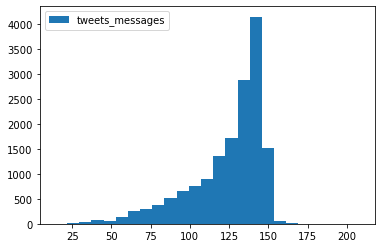

In [14]:
length_data = df_cpy['message'].str.len()

plt.hist(length_data, bins=25, label="tweets_messages")

plt.legend()
plt.show()

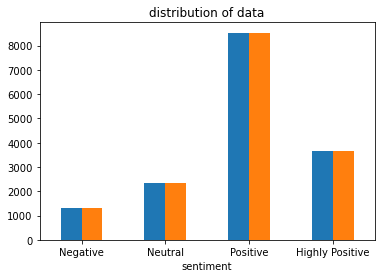

In [15]:
# plotting the distribution for dataset

ax = df_cpy.groupby('sentiment').count().plot(kind='bar', title='distribution of data', legend=False)
ax.set_xticklabels(['Negative','Neutral', 'Positive','Highly Positive'], rotation=0)

text, sentiment = list(df_cpy['message']), list(df_cpy['sentiment'])

by exploring the dataset we can tell that the dataset cointains few data for negative and neutral labels and higher distribution for positive and highly positive.


droping tweetid column

In [16]:
df_cpy.drop('tweetid', axis='columns', inplace=True)

Now we will do an important step of cleaning data, removing unwanted words, characters. This will help us obtain better results.
We are remove unwanted text patterns from the tweets

## Pre-processing

In [17]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

Removing Twitter Handles (@User)

In [18]:
### Removing Twitter Handles (@User)

df_cpy['text'] = np.vectorize(remove_pattern)(df_cpy['message'], "@[\w]*")

df_cpy.head()

,sentiment,message,text
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable","PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via"
1,1,It's not like we lack evidence of anthropogenic global warming,It's not like we lack evidence of anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,RT : Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight","RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"


Removing Short words

We will remove words with length of 3 or less

In [19]:
df_cpy['text'] = df_cpy['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

df_cpy.head()

,sentiment,message,text
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable","PolySciMajor chief doesn't think carbon dioxide main cause global warming and.. wait, what!? https://t.co/yeLvcEFXkC"
1,1,It's not like we lack evidence of anthropogenic global warming,It's like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,Researchers have three years climate change before it’s late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,#TodayinMaker# WIRED 2016 pivotal year climate change https://t.co/44wOTxTLcD
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight","It's 2016, racist, sexist, climate change denying bigot leading polls. #ElectionNight"


In [20]:
toke_message = df_cpy['text'].apply(lambda x: x.split())
toke_message.head()

0    [PolySciMajor, chief, doesn't, think, carbon, dioxide, main, cause, global, warming, and.., wait,, what!?, https://t.co/yeLvcEFXkC]
1                                                                           [It's, like, lack, evidence, anthropogenic, global, warming]
2                  [Researchers, have, three, years, climate, change, before, it’s, late, https://t.co/WdT0KdUr2f, https://t.co/Z0ANPT…]
3                                                 [#TodayinMaker#, WIRED, 2016, pivotal, year, climate, change, https://t.co/44wOTxTLcD]
4                                      [It's, 2016,, racist,, sexist,, climate, change, denying, bigot, leading, polls., #ElectionNight]
Name: text, dtype: object

We Normilise tokenized tweets.

In [21]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

toke_message = toke_message.apply(lambda x: [stemmer.stem(i) for i in x])

Now we will combine these tokens back together.

In [22]:
for i in range(len(toke_message)):
    toke_message[i] = ' '.join(toke_message[i])
df_cpy['text']= toke_message

removing noise 

In [23]:
df_cpy['text'] = df_cpy['text'].str.replace("[^a-zA-Z#]"," ")
df_cpy.head()

,sentiment,message,text
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",polyscimajor chief doesn t think carbon dioxid main caus global warm and wait what https t co yelvcefxkc
1,1,It's not like we lack evidence of anthropogenic global warming,it like lack evid anthropogen global warm
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,research have three year climat chang befor it late https t co wdt kdur f https t co z anpt
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,#todayinmaker# wire pivot year climat chang https t co wotxtlcd
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",it racist sexist climat chang deni bigot lead polls #electionnight


In [24]:
df_cpy.head()

,sentiment,message,text
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",polyscimajor chief doesn t think carbon dioxid main caus global warm and wait what https t co yelvcefxkc
1,1,It's not like we lack evidence of anthropogenic global warming,it like lack evid anthropogen global warm
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,research have three year climat chang befor it late https t co wdt kdur f https t co z anpt
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,#todayinmaker# wire pivot year climat chang https t co wotxtlcd
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",it racist sexist climat chang deni bigot lead polls #electionnight


Visualizing Words from tweets

We will Explore and Visualize data with the cleaned data
We want to explore common words in these trend tweets for negative and positive tweets. check hashtags which are associated with this dataset

Understanding Common Words used in The dataset : WordCloud

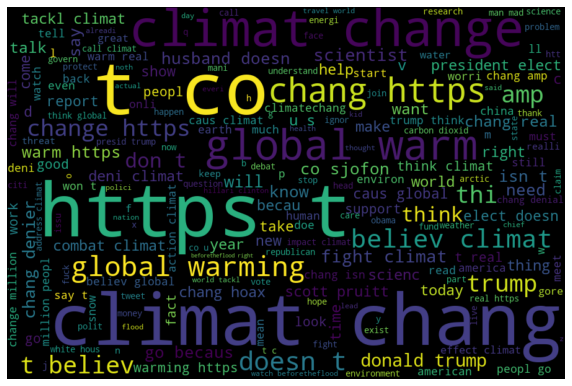

In [25]:
tweets_words = ' '.join([text for text in df_cpy['text']])

from wordcloud import WordCloud

wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(tweets_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Most of the words here are positive and neutral about wells fargo bank, words include: good, trustworthy etc.

Words in Non-pricing '0' tweets

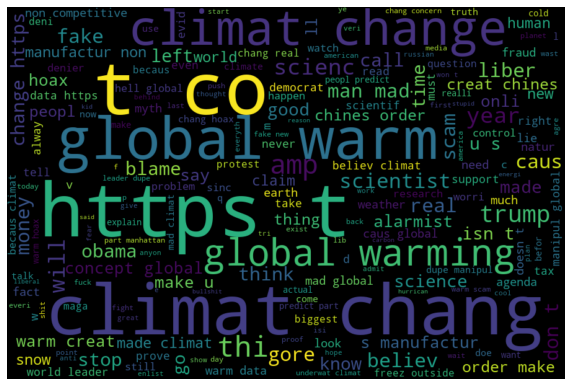

In [26]:
negative_words = ' '.join([text for text in df_cpy['text'][df_cpy['sentiment']== -1]])

wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

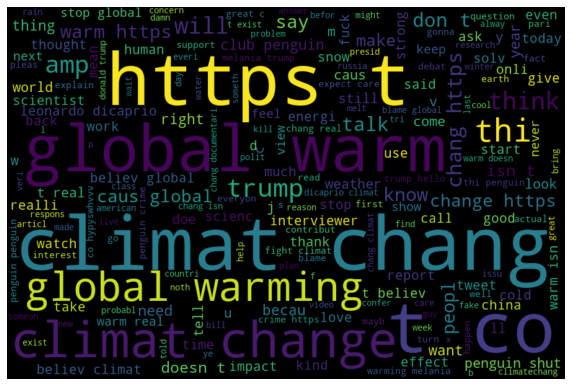

In [27]:
neutral_words = ' '.join([text for text in df_cpy['text'][df_cpy['sentiment'] == 0]])

wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(neutral_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

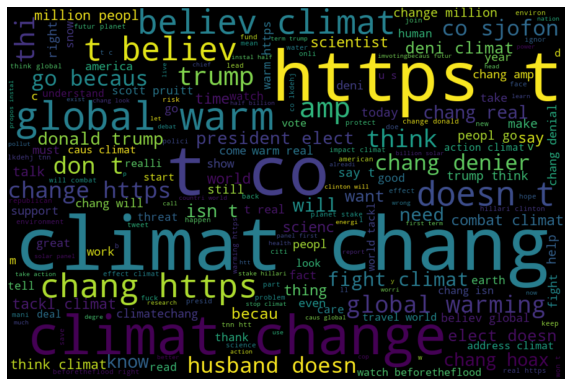

In [28]:
positive_words = ' '.join([text for text in df_cpy['text'][df_cpy['sentiment'] == 1]])

wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

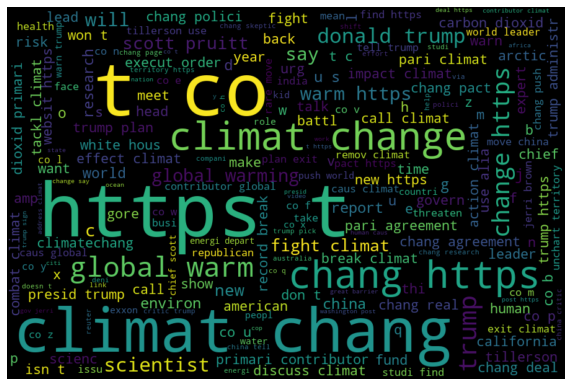

In [29]:
extra_positive_words = ' '.join([text for text in df_cpy['text'][df_cpy['sentiment'] == 2]])

wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=120).generate(extra_positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Before we analyze a pre-processed data, we need to convert it into features:

Bag of words
TF-IDF
Word Embeddings
Bag Of Words

Before we analyze preprocessed data, we have to convert it into features first.

we start with Bag of Words Feature

In Bag of words we use the document data and find a unique tokens to extract words out of the corpus. the words will form a dictionary and size of the bag of words matrics. each row in matrics contains the frequency of tokens in the document.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [31]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df_cpy['text'])

bow.shape

(15819, 1000)

TF-IDF

This approach is different from Bag of Words in such a way that it takes account not just the occurrence of a word in a single document but in the intire corpus.

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF

In [32]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df_cpy['text'])

tfidf.shape

(15819, 1000)

Word2Vec Features

Word Embeddings are modern way of representing words as vectors.

Advantages of using Word Embeddings are:

Dimensionality reduction - significant reduction in the number of features required to build a model.

It capture meanings of the words, semantic relationships and the different types of contexts they are used in

1. Word2Vec Embeddings

Word2Vec is an algorithm with a combination of two techniques - Continuous Bag Of Words and Skip-gram model. Both of these are shallow neural networks which map word(s) to the target variable which is also a word(s). these techniques learn weights act as word vector representations.

We will train a Word2Vec model on our data to obtain vector representations for all the unique words present in our corpus.

We will train our own word vectors since size of the pre-trained word vectors is huge.

Training Word2Vec model in our corpus

In [33]:
tokenized_tweet = df_cpy['text'].apply(lambda x: x.split()) #tokenizing words

model_w2v = gensim.models.Word2Vec(tokenized_tweet,
                                   window=5,
                                   min_count=2,
                                   sg=1,
                                   hs=0,
                                   negative=10,
                                   workers=2,
                                   seed=34)

model_w2v.train(tokenized_tweet, total_examples = len(df_cpy['text']), epochs=20)

(2847010, 4383600)

Now we will check how our Word2Vec model perform, we will specify a word and a model will pull out most similar word s from the corpus.

In [34]:
model_w2v.wv.most_similar(positive='tweets')

[('lawyer', 0.7489051222801208),
 ('tag', 0.6947135329246521),
 ('zx', 0.6879568696022034),
 ('advisors', 0.6787245273590088),
 ('crackdown', 0.6528461575508118),
 ('idupf', 0.6503462195396423),
 ('rj', 0.6412710547447205),
 ('humor', 0.6389542818069458),
 ('credibl', 0.6311616897583008),
 ('#charlesmiland', 0.6305729150772095)]

In [35]:
model_w2v.wv.most_similar(negative='bad')

[('exxonmobil', 0.10315176099538803),
 ('#smartnew', 0.038973644375801086),
 ('program', 0.03161976858973503),
 ('#new', 0.028302380815148354),
 ('prosecutor', 0.021213581785559654),
 ('pipelin', 0.01949656754732132),
 ('sharehold', 0.018532391637563705),
 ('iran', 0.0174863263964653),
 ('email', 0.012763640843331814),
 ('foreign', 0.010843847878277302)]

Preparing Vectors for tweets

In [36]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1,100))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1,100))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [37]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 100))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 100)
    wordvec_df = pd.DataFrame(wordvec_arrays)
    wordvec_df.shape

In [38]:
wordvec_df.shape

(15819, 100)

Now we have 100 features while in Bag of Words and TF-IDF we had 1000

Doc2Vec Embedding

Doc2Vec model is an unsupervised algorithm to generate vectors for sentence, paragraphs and documents. This approach is an extension of the word2vec. The difference between these two is that doc2vec privides an additional context which is unique for every document in the corpus.

In [39]:
# Loading libraries for Doc2Vec model

from tqdm import tqdm 
tqdm.pandas(desc="progress-bar")
#from gensim.models.deprecated.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument

In [40]:
def add_tag(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

tagged_tweets = add_tag(tokenized_tweet)

In [41]:
tagged_tweets[:6]

[TaggedDocument(words=['polyscimajor', 'chief', 'doesn', 't', 'think', 'carbon', 'dioxid', 'main', 'caus', 'global', 'warm', 'and', 'wait', 'what', 'https', 't', 'co', 'yelvcefxkc'], tags=['tweet_0']),
 TaggedDocument(words=['it', 'like', 'lack', 'evid', 'anthropogen', 'global', 'warm'], tags=['tweet_1']),
 TaggedDocument(words=['research', 'have', 'three', 'year', 'climat', 'chang', 'befor', 'it', 'late', 'https', 't', 'co', 'wdt', 'kdur', 'f', 'https', 't', 'co', 'z', 'anpt'], tags=['tweet_2']),
 TaggedDocument(words=['#todayinmaker#', 'wire', 'pivot', 'year', 'climat', 'chang', 'https', 't', 'co', 'wotxtlcd'], tags=['tweet_3']),
 TaggedDocument(words=['it', 'racist', 'sexist', 'climat', 'chang', 'deni', 'bigot', 'lead', 'polls', '#electionnight'], tags=['tweet_4']),
 TaggedDocument(words=['worth', 'read', 'whether', 'don', 't', 'believ', 'climat', 'chang', 'https', 't', 'co', 'gglzvnyjun', 'https', 't', 'co', 'afe', 'mah', 'j'], tags=['tweet_5'])]

Training doc2vec model

In [42]:
model_d2v = gensim.models.Doc2Vec(dm=1,
                                 dm_mean=1,
                                 window=5,
                                 negative=7,
                                 min_count=5,
                                 workers=3,
                                 alpha=0.1,
                                  seed=23)

model_d2v.build_vocab([i for i in tqdm(tagged_tweets)])

model_d2v.train(tagged_tweets, total_examples = len(df_cpy['text']), epochs=15)

100%|██████████| 15819/15819 [00:00<00:00, 932939.09it/s]


In [43]:
docvec_arrays = np.zeros((len(tokenized_tweet), 100))
for i in range(len(df_cpy)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,100))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

(15819, 100)

We have completed the pre-modeling stage. Now we want to build models on the dataset with different sets prepared ealier on sections: Bag Of Words, TF-IDf, Word2Vec, and Doc2Vec vectors. we will use these algorithms:

Logistic Regression
Support Vector Machine
Random Forest
Naive Bayes
XGBoost

Evaluation Metrics:

We will use F1_Score in the evaluation of metric

True Positive(TP) - correctly predicted positive values, means the values of actual class is yes and the value of predicted is also yes.

True Negative(TN) - correctly predicted negative values, means the values of actual class is no and the value predicted is also no.

False positive(FP) - When the actual class is no and predicted class is yes.

False Negative(FN) - When actual class is yes but predicted class is no.

Precision = TP/TP+FP

Recall = TP/TP+FN

F1 Score = 2 (Recall Precision)/(Recall+Precision)

Logistc Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [45]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [46]:
train_bow = bow[:15819,:]
test_bow = bow[15819:,:]

#Splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, df_cpy['sentiment'], random_state=42, test_size=0.2)

Ireg = LogisticRegression()
Ireg.fit(xtrain_bow, ytrain)

prediction = Ireg.predict_proba(xvalid_bow)


prediction_int = prediction[:,1] >= 0.2 
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int, average='micro')
#f1_score(y_true, y_pred, average=None)

0.16529709228824274

In [49]:
from sklearn import svm

In [50]:
# Word2Vec feature
train_w2v = wordvec_df.iloc[:15819,:]
test_w2v = wordvec_df.iloc[15819:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]



svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v,ytrain)
prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.2
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int,average='micro')

0.1529709228824273

Random Forest Algorithm

In the RandomForest Machine learning algorithm we will use Word2Vec features

Random Forest Machine Learning algorithm is capable of performing in both regression and classification problems.

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
# Word2Vec feature
train_w2v = wordvec_df.iloc[:15819,:]
test_w2v = wordvec_df.iloc[15819:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

# Random Forest Modelling 
rf =RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)
prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction, average='micro')
#print('Accuracy Score for Naive Bayes: ', accuracy_score(prediction, test_w2v))
#print("\n\nClassification Report:\n\n", classification_report(prediction, test_w2v))

0.70448798988622

In [67]:
test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


Making prediction for test dataset, then create submission file

In [68]:
test_pred = rf.predict(test_w2v)
test['sentiment'] = test_pred

submission = test[['tweetid','sentiment']]
submission.to_csv('rf_submit.csv', index=False)

ValueError: Found array with 0 sample(s) (shape=(0, 100)) while a minimum of 1 is required.

In [53]:
from xgboost import XGBClassifier

In [54]:
# Doc2Vec features
train_d2v = docvec_df.iloc[:15819,:]
test_d2v = docvec_df.iloc[15819:,:]

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

#XGBoost algorithm
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(xtrain_d2v, ytrain)
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction, average='micro')

[09:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.645385587863464

# Other way of using algorithms

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss

import warnings
warnings.filterwarnings("ignore")

In [56]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes

In [57]:
# Get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(train_w2v, df_cpy['sentiment'], test_size=0.2, random_state=42)
# Define the model 
naive_bayes = GaussianNB()
# Fit the model 
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [58]:
y_pred = naive_bayes.predict(X_test)

In [59]:
print("The accuracy score of the Naive Bayes is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test,y_pred))

The accuracy score of the Naive Bayes is: 0.5442477876106194


Classification Report:

               precision    recall  f1-score   support

          -1       0.30      0.42      0.35       278
           0       0.41      0.38      0.39       425
           1       0.76      0.49      0.60      1755
           2       0.47      0.82      0.60       706

    accuracy                           0.54      3164
   macro avg       0.48      0.53      0.48      3164
weighted avg       0.61      0.54      0.55      3164



# Logistic Regression

In [69]:
X_train, X_test, y_train, y_test = train_test_split(train_bow, df_cpy['sentiment'], test_size=0.2, random_state=50)

In [70]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (12655, 1000)
X_test shape: (3164, 1000)
y_train shape: (12655,)
y_test shape: (3164,)


In [71]:
classifier = LogisticRegression(random_state = 50)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=50)

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)

In [74]:
#cl_report=classification_report(y_test,y_pred)
print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test,y_pred))


The accuracy score of the SVC is: 0.702275600505689


Classification Report:

               precision    recall  f1-score   support

          -1       0.56      0.30      0.39       254
           0       0.54      0.41      0.47       457
           1       0.74      0.84      0.79      1736
           2       0.70      0.71      0.70       717

    accuracy                           0.70      3164
   macro avg       0.64      0.56      0.59      3164
weighted avg       0.69      0.70      0.69      3164



In [77]:
test_pred = classifier.predict(X_test)
test['sentiment'] = test_pred

submission = test[['tweetid','sentiment']]
submission.to_csv('rf_submit.csv', index=False)

ValueError: Length of values (3164) does not match length of index (10546)

# XGBoost Algorithm 

In [66]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread=3).fit(X_train, y_train)
prediction = xgb.predict(X_test)

#f1_score(y_test, prediction)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test,y_pred))

[09:43:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy score of the SVC is: 0.702275600505689


Classification Report:

               precision    recall  f1-score   support

          -1       0.56      0.30      0.39       254
           0       0.54      0.41      0.47       457
           1       0.74      0.84      0.79      1736
           2       0.70      0.71      0.70       717

    accuracy                           0.70      3164
   macro avg       0.64      0.56      0.59      3164
weighted avg       0.69      0.70      0.69      3164

